In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm


# Research data file
file_path = "C:/Users/emaad/Documents/Bootcamp_UofT/GroupProject/Resources/data.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
df

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [2]:
# List of countries you want to keep
countries_to_keep = ["India", "United States", "United Kingdom", "Russian Federation", "Canada", "China, P.R.: Mainland", "Italy", "France", "Japan", "Germany"]

# Filter the DataFrame to keep only the specified countries
filtered_df = df[df['Country'].isin(countries_to_keep)]

# Display the filtered DataFrame
filtered_df

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
35,36,Canada,CA,CAN,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.182,0.288,1.231,2.373,1.480,0.477,1.311,1.128,2.515,1.268
42,43,"China, P.R.: Mainland",CN,CHN,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.073,1.062,1.297,1.319,1.573,1.361,1.422,1.620,1.701,1.906
69,70,France,FR,FRA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.714,2.049,1.612,1.794,1.796,2.060,2.023,2.551,1.337,2.929
74,75,Germany,DE,DEU,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.583,2.519,1.674,1.988,1.653,2.393,2.332,2.516,1.325,2.596
90,91,India,IN,IND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.451,0.530,0.711,1.088,0.966,0.874,0.802,0.520,0.733,0.790
97,98,Italy,IT,ITA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.006,1.638,1.704,1.716,1.606,1.834,1.698,1.902,1.569,2.135
99,100,Japan,JP,JPN,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.628,0.560,0.833,1.323,0.796,0.926,1.272,1.437,1.270,1.335
165,166,Russian Federation,RU,RUS,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.166,1.753,2.246,2.459,2.127,2.043,2.178,3.691,1.643,2.261
210,211,United Kingdom,GB,GBR,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.364,1.718,0.614,1.161,1.424,0.998,1.231,1.373,0.929,1.911
211,212,United States,US,USA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.614,0.501,1.531,2.224,1.433,1.276,1.034,1.324,1.144,1.217


In [3]:
#Identify specific countries to retain and specify columns to remove

columns_to_drop = ["ISO2", "ISO3", "Source", "CTS_Code", "CTS_Full_Descriptor", "CTS_Name", "F1961", "F1962", "F1963", "F1964", "F1965", "F1966", "F1967",
                   "F1968", "F1969", "F1970", "F1971", "F1972", "F1973", "F1974", "F1975", "F1976", "F1977", "F1978", "F1979", "F1980", "F1981", 
                   "F1982", "F1983", "F1984", "F1985", "F1986", "F1987", "F1988", "F1989", "F2022"]


# Filter the DataFrame to keep only specific columns and countries
drop_df = filtered_df.drop(columns=columns_to_drop)

drop_df

,ObjectId,Country,Indicator,Unit,F1990,F1991,F1992,F1993,F1994,F1995,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
35,36,Canada,Temperature change with respect to a baseline ...,Degree Celsius,0.078,0.336,0.100,0.342,0.467,0.938,...,2.144,1.182,0.288,1.231,2.373,1.480,0.477,1.311,1.128,2.515
42,43,"China, P.R.: Mainland",Temperature change with respect to a baseline ...,Degree Celsius,0.852,0.520,0.130,0.281,0.733,0.577,...,0.626,1.073,1.062,1.297,1.319,1.573,1.361,1.422,1.620,1.701
69,70,France,Temperature change with respect to a baseline ...,Degree Celsius,1.591,0.257,0.659,0.325,1.547,1.326,...,1.220,0.714,2.049,1.612,1.794,1.796,2.060,2.023,2.551,1.337
74,75,Germany,Temperature change with respect to a baseline ...,Degree Celsius,1.571,0.286,1.228,0.310,1.625,1.307,...,1.349,0.583,2.519,1.674,1.988,1.653,2.393,2.332,2.516,1.325
90,91,India,Temperature change with respect to a baseline ...,Degree Celsius,-0.081,0.190,0.035,0.223,0.107,0.238,...,0.516,0.451,0.530,0.711,1.088,0.966,0.874,0.802,0.520,0.733
97,98,Italy,Temperature change with respect to a baseline ...,Degree Celsius,1.132,0.029,0.542,0.527,1.513,0.418,...,1.543,1.006,1.638,1.704,1.716,1.606,1.834,1.698,1.902,1.569
99,100,Japan,Temperature change with respect to a baseline ...,Degree Celsius,1.132,0.726,0.333,0.012,0.965,0.348,...,0.395,0.628,0.560,0.833,1.323,0.796,0.926,1.272,1.437,1.270
165,166,Russian Federation,Temperature change with respect to a baseline ...,Degree Celsius,NaN,NaN,0.359,0.951,0.572,2.101,...,1.933,1.166,1.753,2.246,2.459,2.127,2.043,2.178,3.691,1.643
210,211,United Kingdom,Temperature change with respect to a baseline ...,Degree Celsius,1.016,0.210,0.522,-0.015,0.413,1.119,...,0.576,0.364,1.718,0.614,1.161,1.424,0.998,1.231,1.373,0.929
211,212,United States,Temperature change with respect to a baseline ...,Degree Celsius,0.674,0.527,0.395,0.004,0.466,0.630,...,1.448,0.614,0.501,1.531,2.224,1.433,1.276,1.034,1.324,1.144


In [4]:
drop_df = drop_df.drop(columns = ["Indicator","Unit"]) 

In [5]:
drop_df = drop_df.drop(columns = ["ObjectId"]) 

In [6]:
drop_df.columns

Index(['Country', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994', 'F1995',
       'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003',
       'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011',
       'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019',
       'F2020', 'F2021'],
      dtype='object')

In [7]:
drop_df.set_index("Country", inplace = True)

In [8]:
drop_df

,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
Country,,,,,,,,,,,,,,,,,,,,,
Canada,0.078,0.336,0.100,0.342,0.467,0.938,-0.125,0.426,2.470,1.694,...,2.144,1.182,0.288,1.231,2.373,1.480,0.477,1.311,1.128,2.515
"China, P.R.: Mainland",0.852,0.520,0.130,0.281,0.733,0.577,0.210,0.733,1.264,1.231,...,0.626,1.073,1.062,1.297,1.319,1.573,1.361,1.422,1.620,1.701
France,1.591,0.257,0.659,0.325,1.547,1.326,0.188,1.240,0.947,1.199,...,1.220,0.714,2.049,1.612,1.794,1.796,2.060,2.023,2.551,1.337
Germany,1.571,0.286,1.228,0.310,1.625,1.307,-0.699,0.558,1.153,1.367,...,1.349,0.583,2.519,1.674,1.988,1.653,2.393,2.332,2.516,1.325
India,-0.081,0.190,0.035,0.223,0.107,0.238,0.339,-0.064,0.614,0.468,...,0.516,0.451,0.530,0.711,1.088,0.966,0.874,0.802,0.520,0.733
Italy,1.132,0.029,0.542,0.527,1.513,0.418,0.233,0.931,0.969,0.918,...,1.543,1.006,1.638,1.704,1.716,1.606,1.834,1.698,1.902,1.569
Japan,1.132,0.726,0.333,0.012,0.965,0.348,-0.127,0.454,1.199,0.948,...,0.395,0.628,0.560,0.833,1.323,0.796,0.926,1.272,1.437,1.270
Russian Federation,NaN,NaN,0.359,0.951,0.572,2.101,0.808,1.277,-0.035,0.413,...,1.933,1.166,1.753,2.246,2.459,2.127,2.043,2.178,3.691,1.643
United Kingdom,1.016,0.210,0.522,-0.015,0.413,1.119,-0.142,0.882,0.860,1.133,...,0.576,0.364,1.718,0.614,1.161,1.424,0.998,1.231,1.373,0.929


In [9]:
# # Pivot the dataframe
# country_df = drop_df.pivot_table(index=None, columns='Country')

# # Set the index to the years
# country_df.index = range(1990, 2021)

# # Display the resulting dataframe
# country_df

country_df = drop_df.transpose()
country_df

Country,Canada,"China, P.R.: Mainland",France,Germany,India,Italy,Japan,Russian Federation,United Kingdom,United States
F1990,0.078,0.852,1.591,1.571,-0.081,1.132,1.132,NaN,1.016,0.674
F1991,0.336,0.520,0.257,0.286,0.190,0.029,0.726,NaN,0.210,0.527
F1992,0.100,0.130,0.659,1.228,0.035,0.542,0.333,0.359,0.522,0.395
F1993,0.342,0.281,0.325,0.310,0.223,0.527,0.012,0.951,-0.015,0.004
F1994,0.467,0.733,1.547,1.625,0.107,1.513,0.965,0.572,0.413,0.466
F1995,0.938,0.577,1.326,1.307,0.238,0.418,0.348,2.101,1.119,0.630
F1996,-0.125,0.210,0.188,-0.699,0.339,0.233,-0.127,0.808,-0.142,-0.011
F1997,0.426,0.733,1.240,0.558,-0.064,0.931,0.454,1.277,0.882,0.384
F1998,2.470,1.264,0.947,1.153,0.614,0.969,1.199,-0.035,0.860,1.272
F1999,1.694,1.231,1.199,1.367,0.468,0.918,0.948,0.413,1.133,0.758


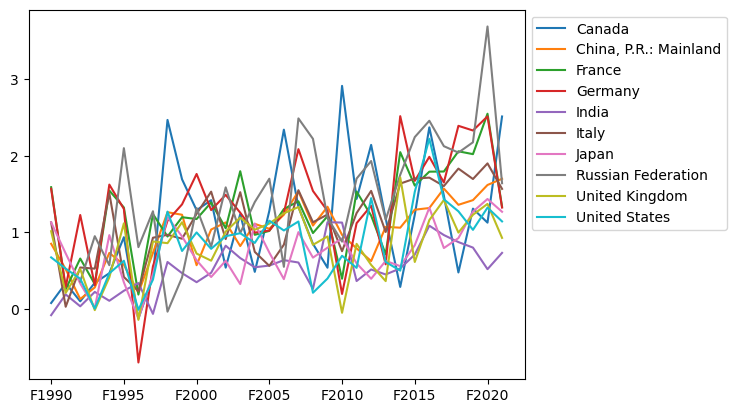

In [10]:
ax = country_df.plot()
ax.legend(loc="upper left", bbox_to_anchor = (1,1))

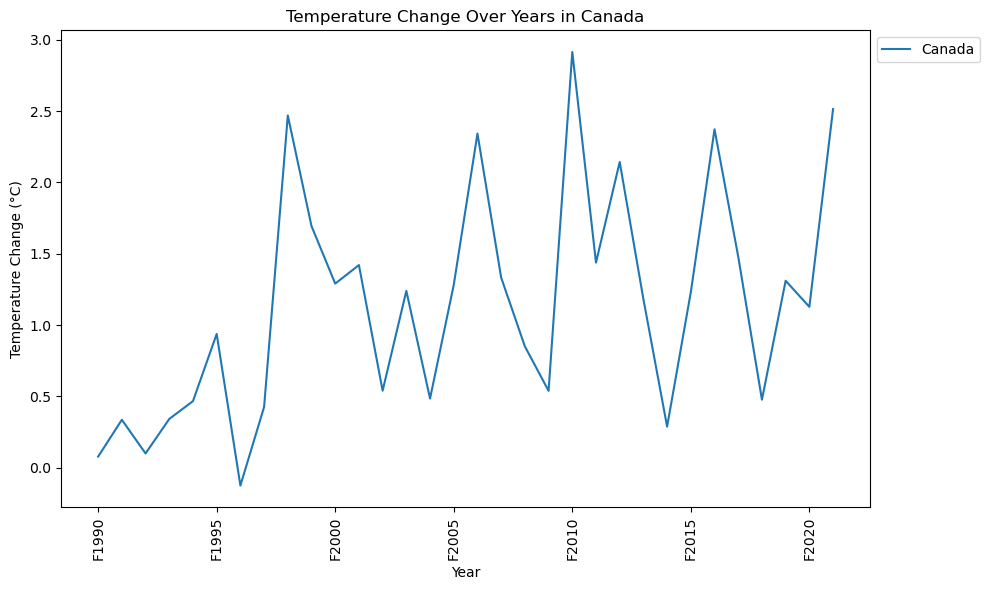

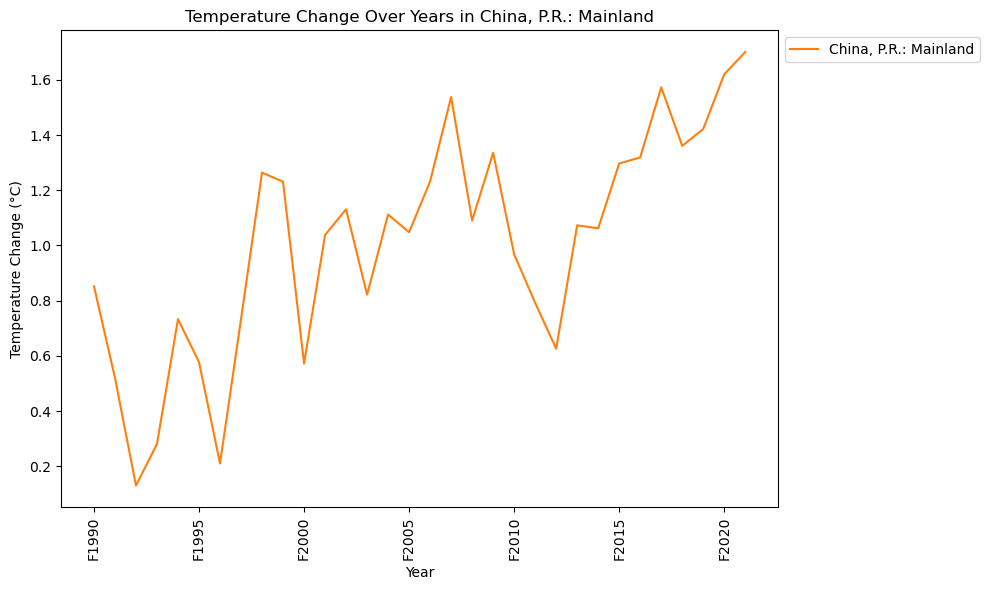

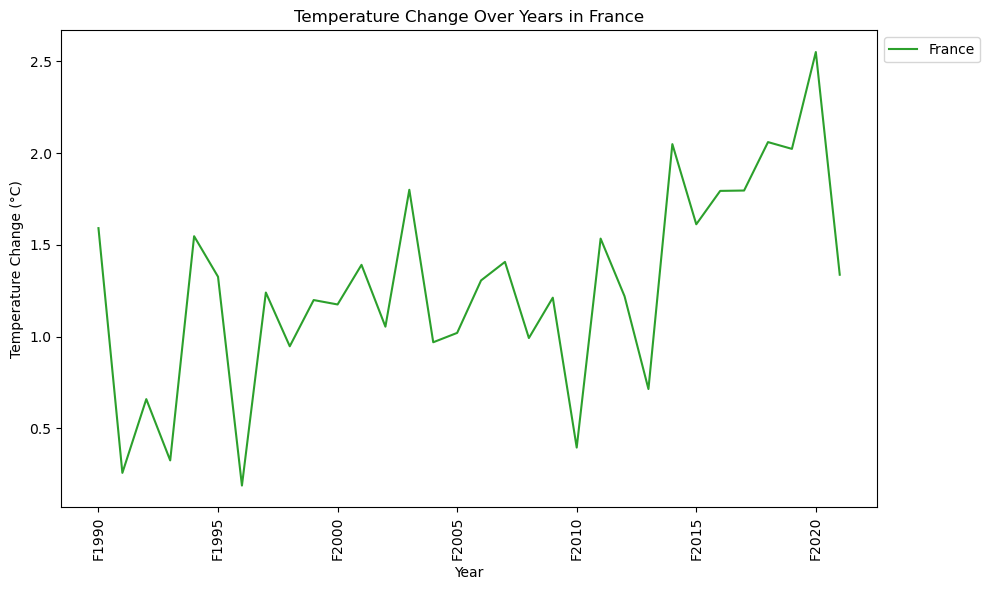

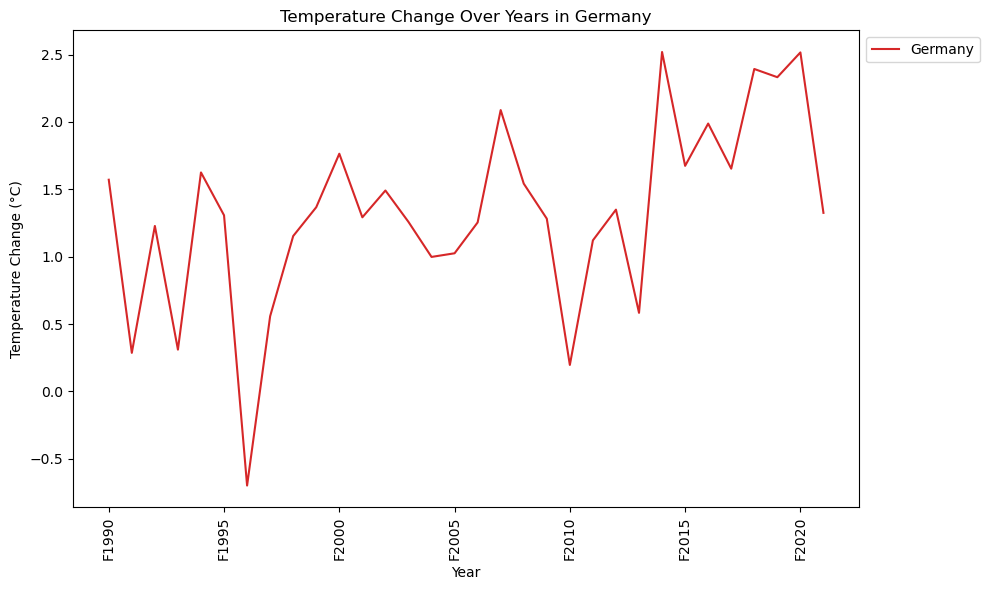

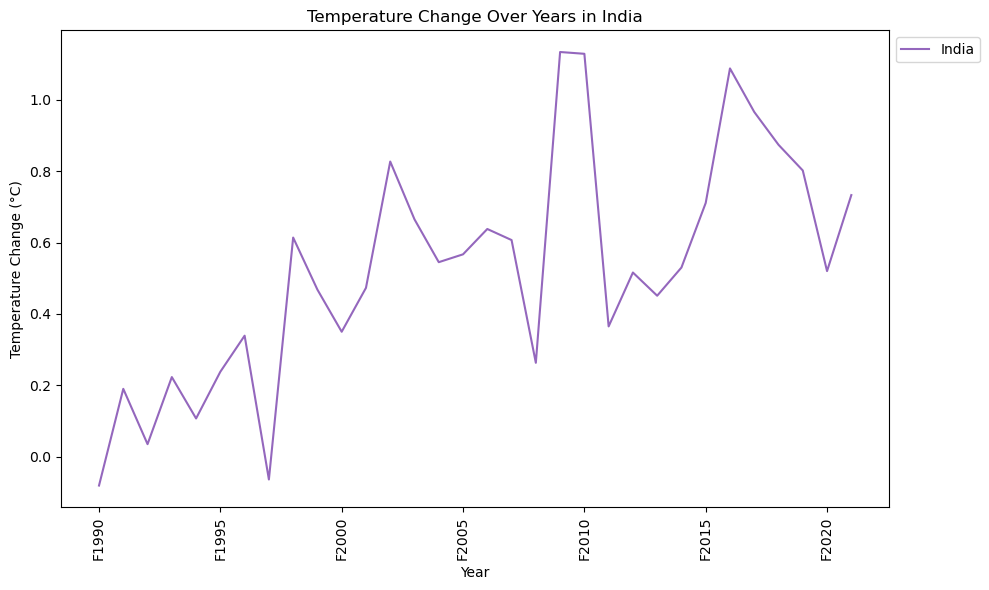

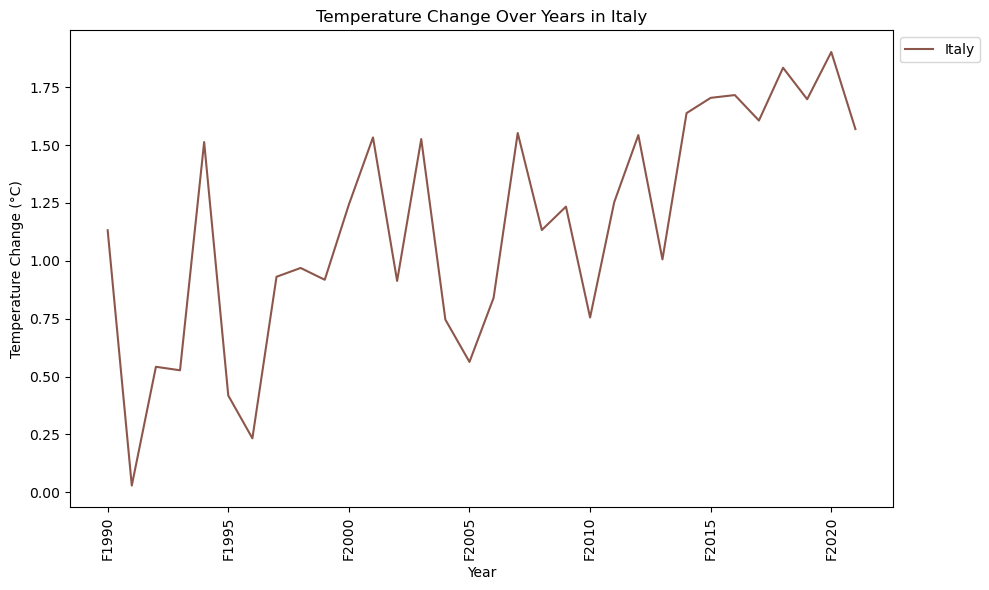

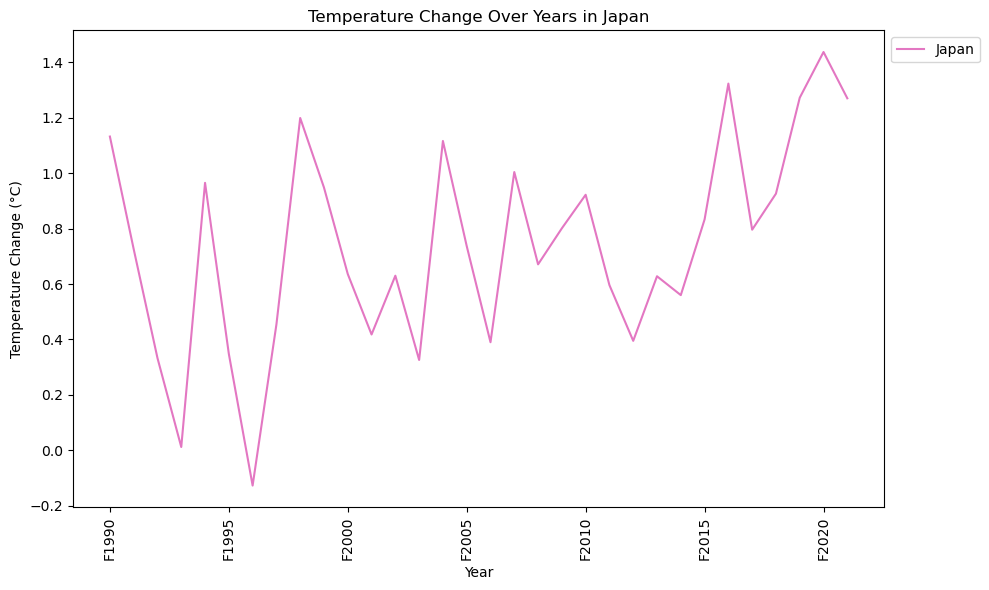

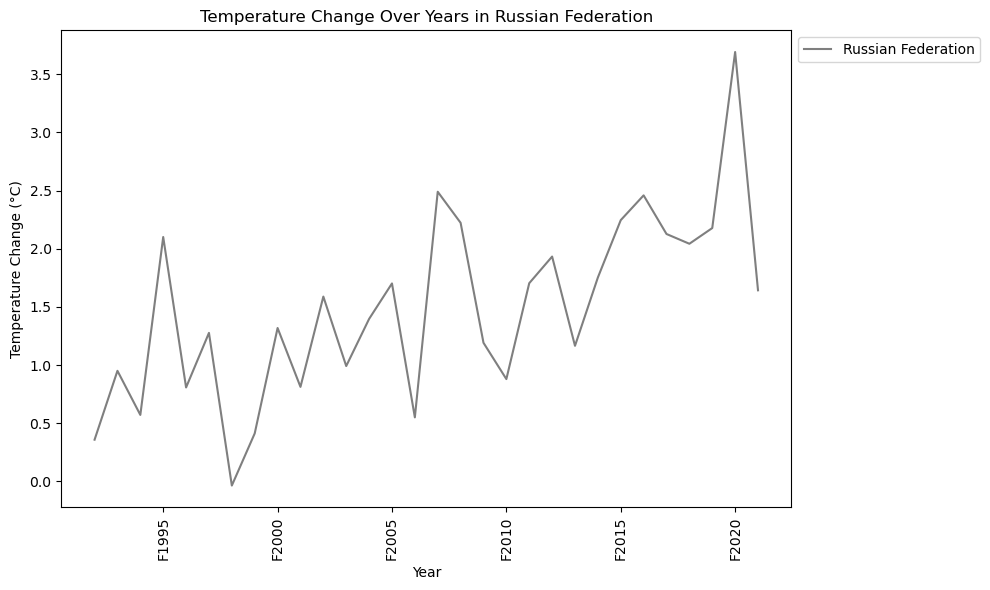

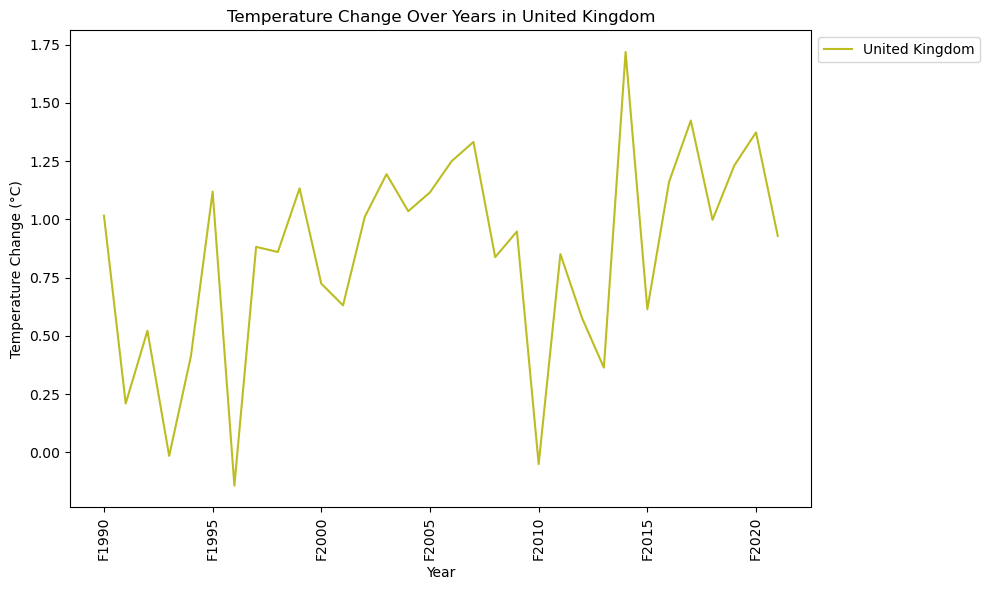

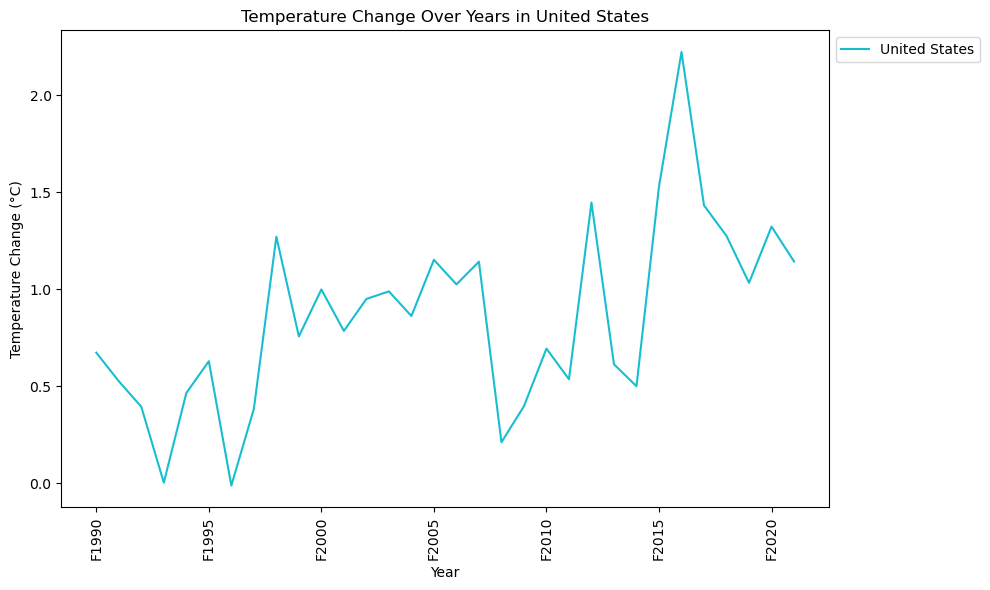

In [11]:
# Transpose the DataFrame
country_df = drop_df.transpose()

# Define a colormap
colors = cm.tab10.colors  # You can choose any colormap you prefer

# Iterate over each country
for i, country in enumerate(country_df.columns):
    # Create a new figure and axis for each country
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot data for the current country with a specific color
    country_df[country].plot(ax=ax, color=colors[i % len(colors)])  # Use modulus to cycle through colors if more countries than colors
    
    # Adjust legend position
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
    
    # Set plot title and labels
    ax.set_title(f'Temperature Change Over Years in {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature Change (°C)')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
    
    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()
